In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs

In [15]:
def calculate_strategy_returns(start_date, end_date):
    # Download historical data as dataframe
    gld_data = yf.download('GLD', start=start_date, end=end_date)
    splv_data = yf.download('JKD', start=start_date, end=end_date)

    # We're interested in the closing prices
    gld_prices = gld_data['Close']
    splv_prices = splv_data['Close']

    # Create an empty signal series for GLD and SPLV
    gld_signals = pd.Series(0, index=gld_prices.index)
    splv_signals = pd.Series(0, index=splv_prices.index)

    # Set the GLD signal to 1 from December 20 through February 20, and during August
    gld_signals[((gld_signals.index.month == 12) & (gld_signals.index.day >= 20)) |
                ((gld_signals.index.month == 1)) |
                ((gld_signals.index.month == 2) & (gld_signals.index.day <= 20)) |
                ((gld_signals.index.month == 8))] = 1

    # Set the SPLV signal to 1 when the GLD signal is 0
    splv_signals[gld_signals == 0] = 1

    # Calculate returns of the strategy
    gld_returns = gld_prices[gld_signals == 1].pct_change()
    splv_returns = splv_prices[splv_signals == 1].pct_change()

    # Combine the returns
    total_returns = gld_returns.combine_first(splv_returns).fillna(0)

    return total_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                           Strategy
-------------------------  ----------
Start Period               2004-12-20
End Period                 2019-10-02
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          1,116.08%
CAGR%                      18.4%
Sharpe                     1.05
Sortino                    1.61
Max Drawdown               -23.54%
Longest DD Days            556
Volatility (ann.)          22.68%
Calmar                     0.78
Skew                       1.25
Kurtosis                   46.56

Expected Daily %           0.08%
Expected Monthly %         1.71%
Expected Yearly %          16.9%
Kelly Criterion            11.7%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.26%
Expected Shortfall (cVaR)  -2.26%

Payoff Ratio               1.06
Profit Factor              1.27
Common Sense Ratio         1.37
CPC Index                  0.73
Tail Ratio                 1.07
Outlier Win Ratio          4.04
Outlier Loss Ratio        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-01-23,2015-12-30,2016-08-01,556,-23.535729,-22.947659
2,2011-08-23,2011-12-29,2012-03-13,203,-21.982126,-21.125865
3,2018-01-25,2018-12-19,2019-04-05,435,-21.187740,-17.570334
4,2013-07-19,2013-12-30,2014-11-26,495,-19.843168,-19.336064
5,2008-08-01,2008-08-15,2009-02-17,200,-16.741743,-15.486910


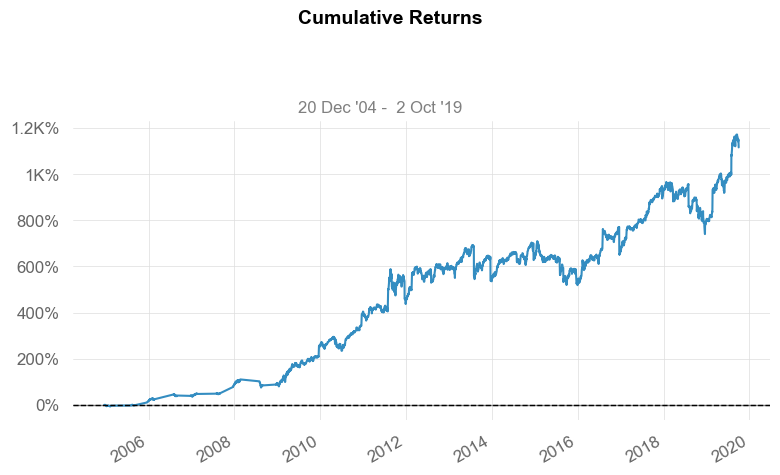

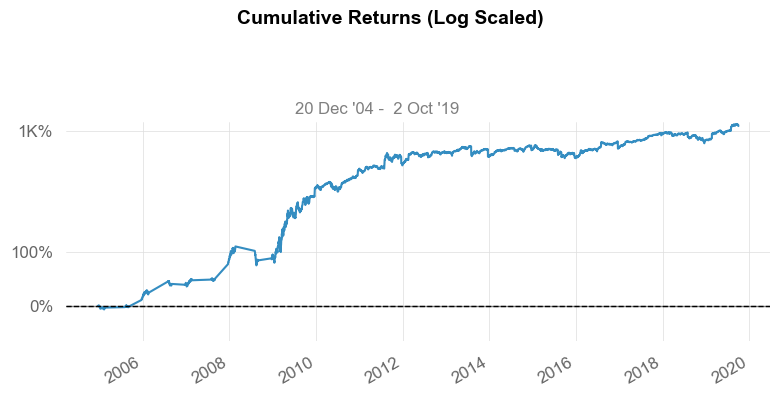

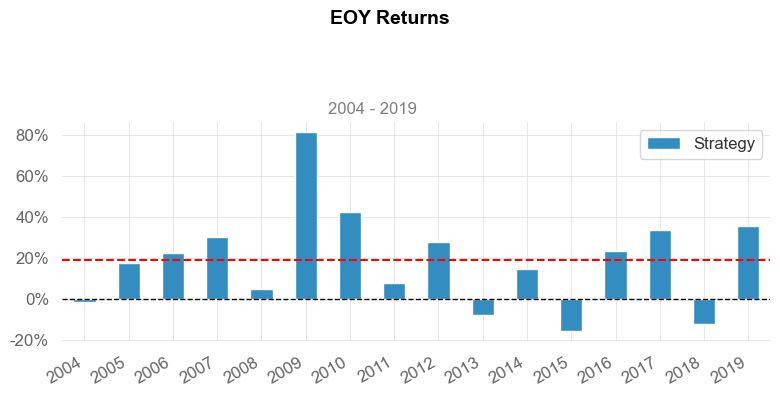

F:\anaconda3\envs\backtest\lib\site-packages\quantstats\_plotting\core.py:340: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _sns.distplot(returns, bins=bins,


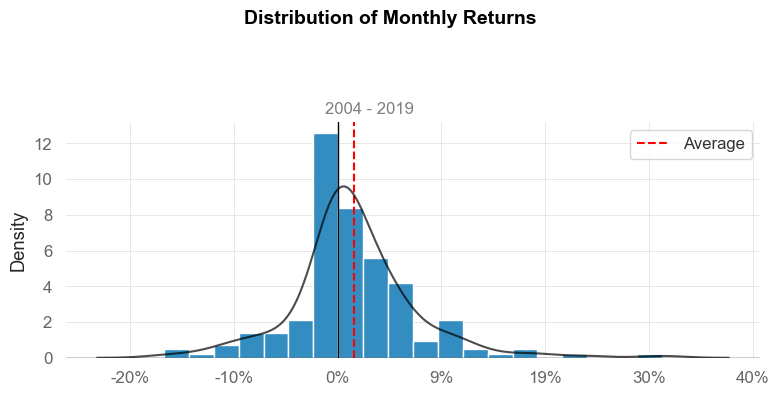

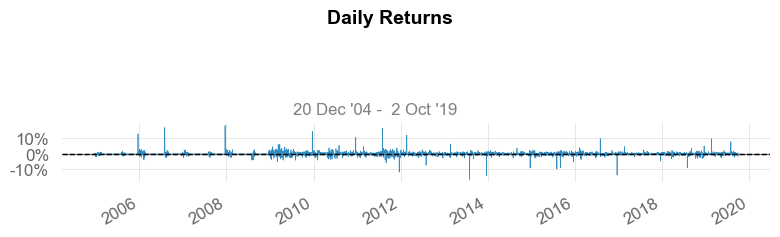

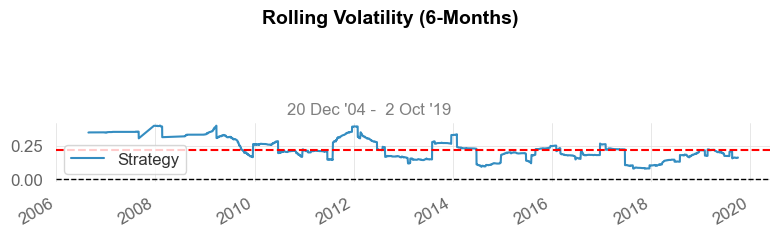

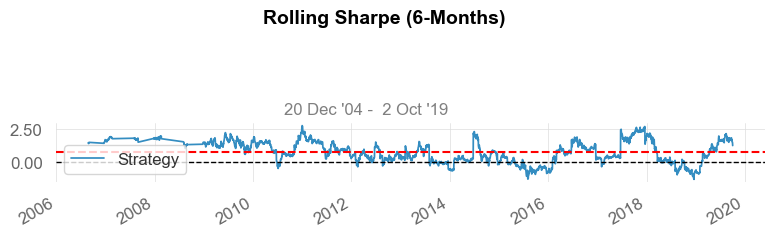

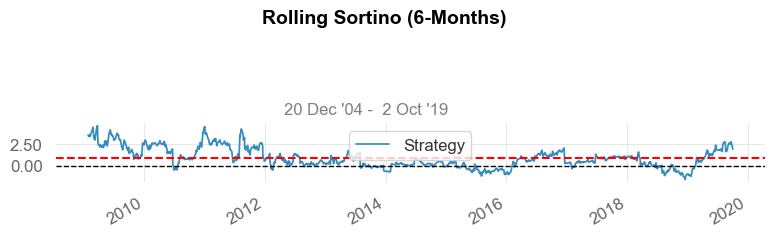

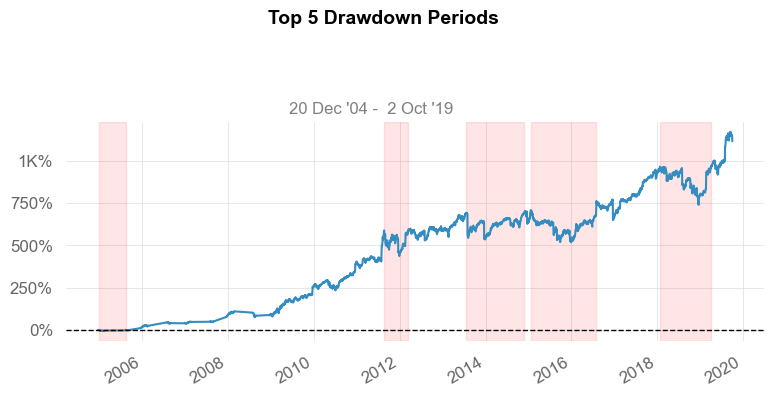

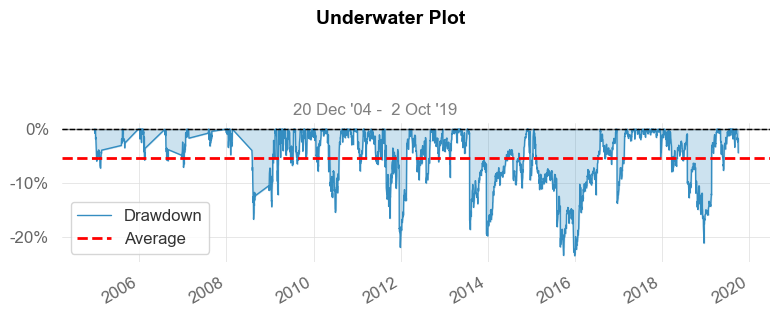

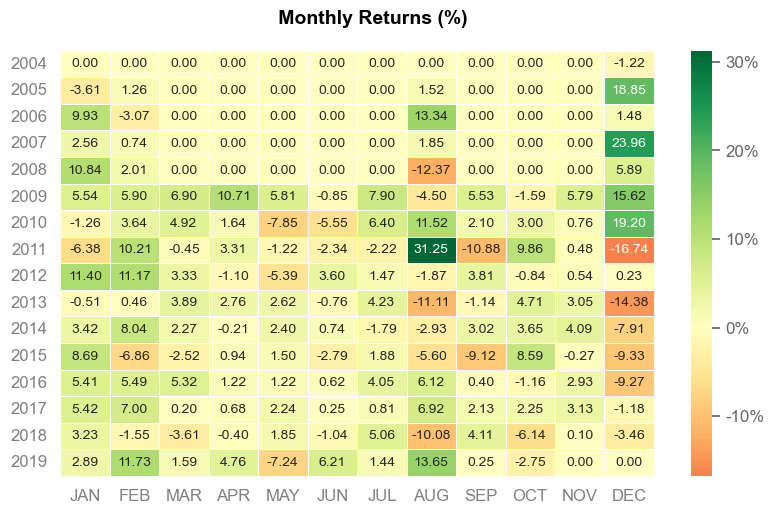

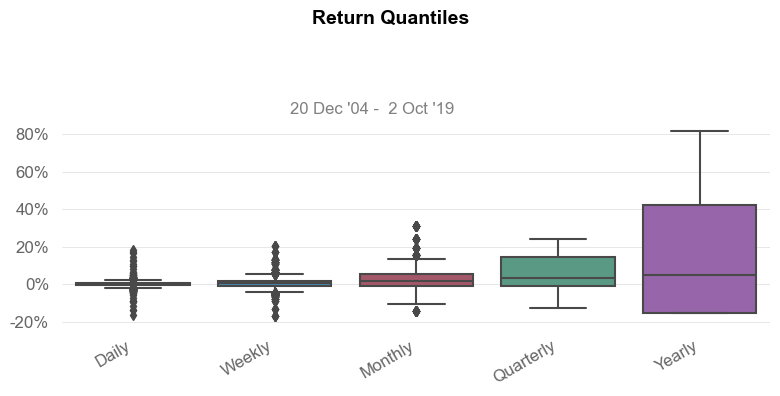

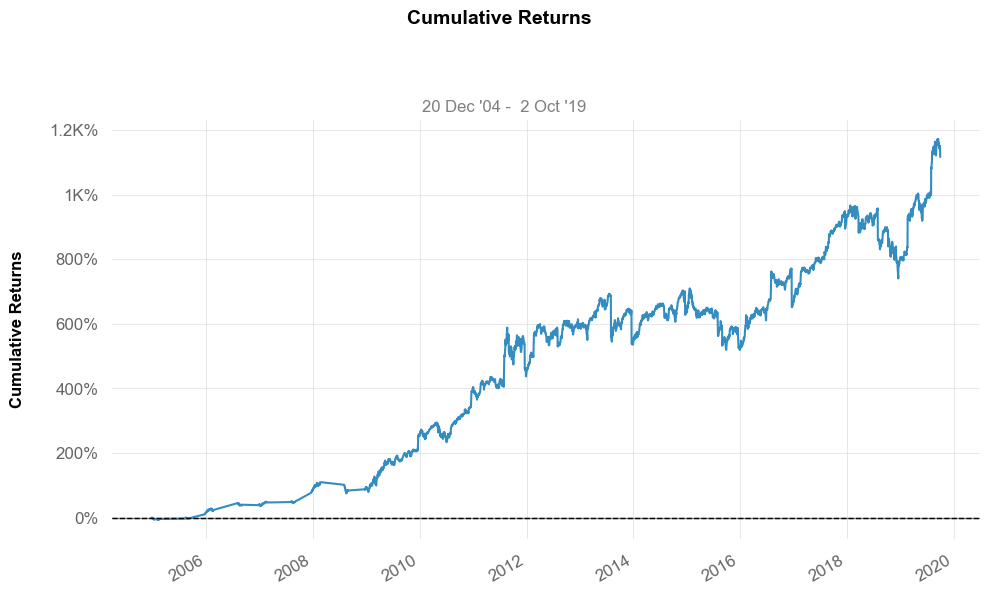

In [17]:
start_date = '2004-01-01'
end_date = '2019-10-03'

returns = calculate_strategy_returns(start_date, end_date)

# Analyze the performance
qs.reports.full(returns)

# Plot the returns
qs.plots.returns(returns)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                           Strategy
-------------------------  ----------
Start Period               2020-01-02
End Period                 2023-06-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -62.52%
CAGR%                      -24.51%
Sharpe                     -0.12
Sortino                    -0.13
Max Drawdown               -79.29%
Longest DD Days            1221
Volatility (ann.)          49.43%
Calmar                     -0.31
Skew                       -15.58
Kurtosis                   385.95

Expected Daily %           -0.11%
Expected Monthly %         -2.31%
Expected Yearly %          -21.76%
Kelly Criterion            -2.13%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.14%
Expected Shortfall (cVaR)  -5.14%

Payoff Ratio               0.86
Profit Factor              0.96
Common Sense Ratio         0.86
CPC Index                  0.44
Tail Ratio                 0.89
Outlier Win Ratio          4.38
Outlier Loss R

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-24,2020-05-13,2023-06-29,1221,-79.294777,-78.544635
2,2020-02-03,2020-02-04,2020-02-18,15,-1.942014,-1.821470
3,2020-01-08,2020-01-14,2020-01-24,16,-1.540852,-1.452993
4,2020-01-28,2020-01-28,2020-01-31,3,-0.892679,-0.355728


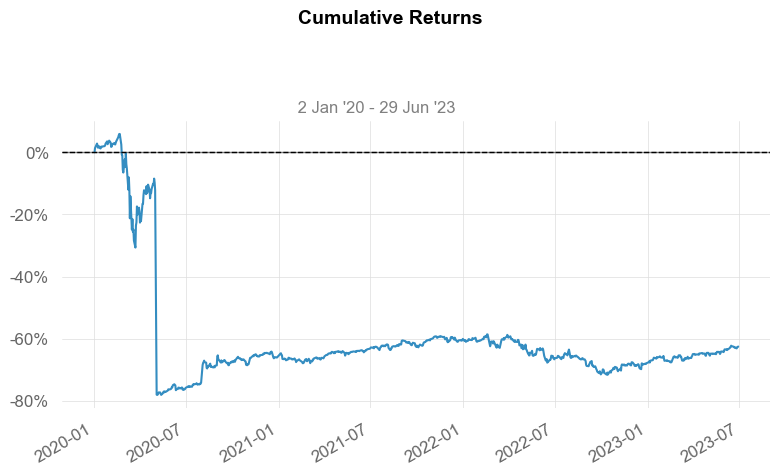

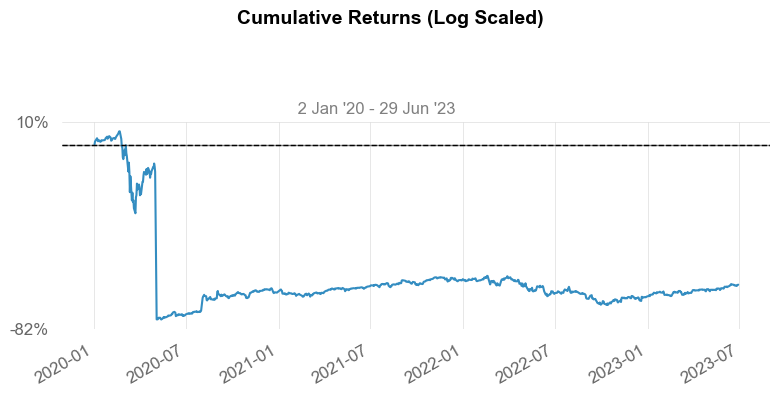

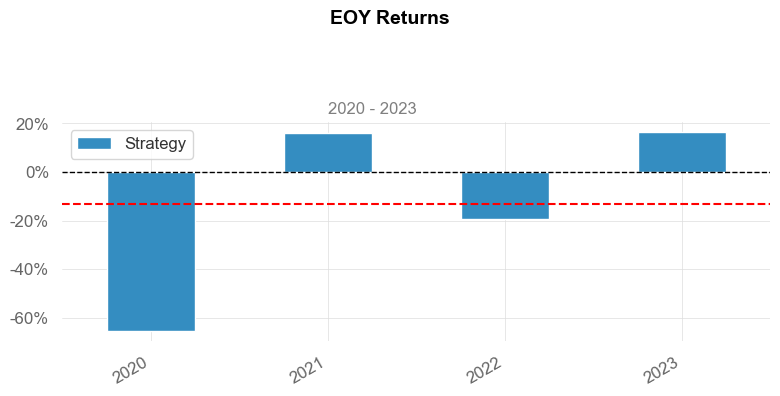

F:\anaconda3\envs\backtest\lib\site-packages\quantstats\_plotting\core.py:340: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _sns.distplot(returns, bins=bins,


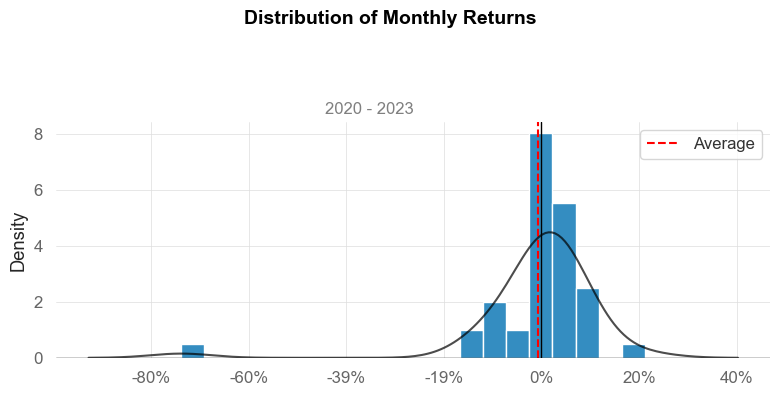

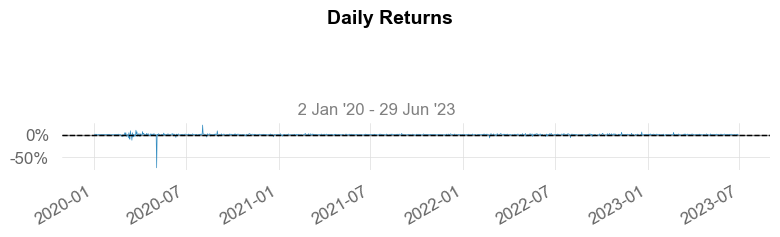

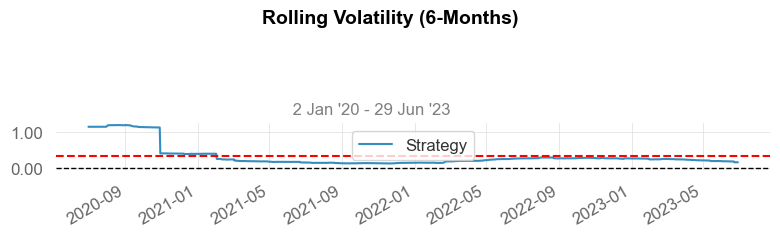

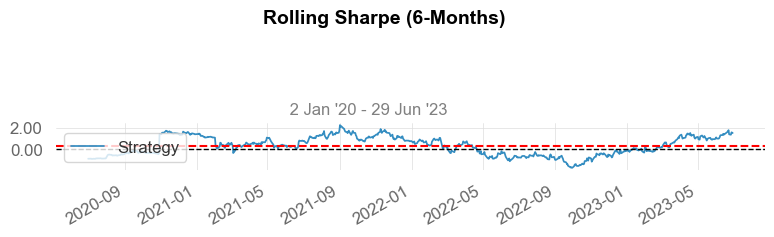

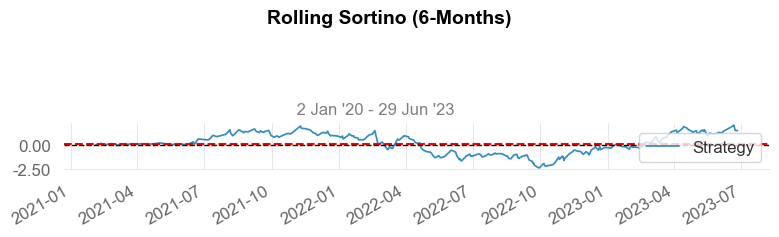

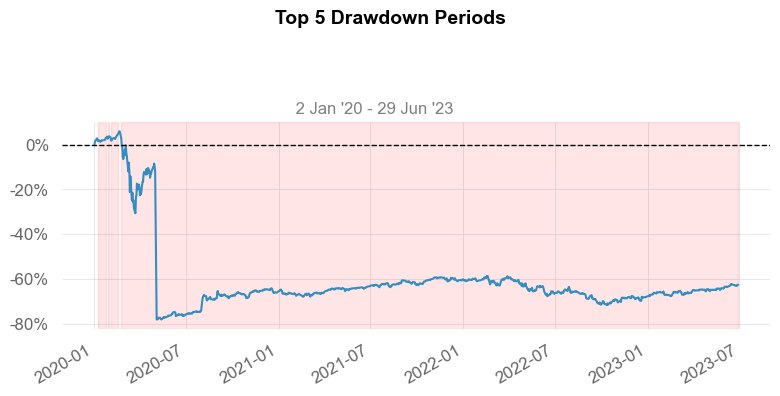

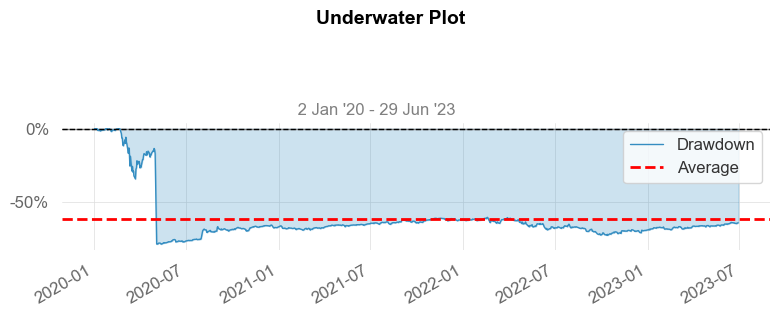

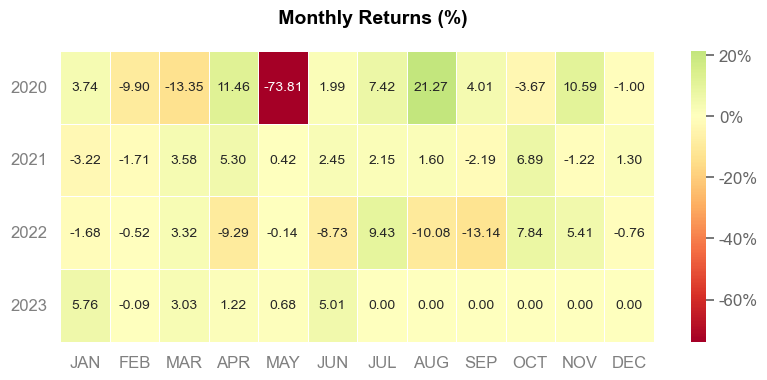

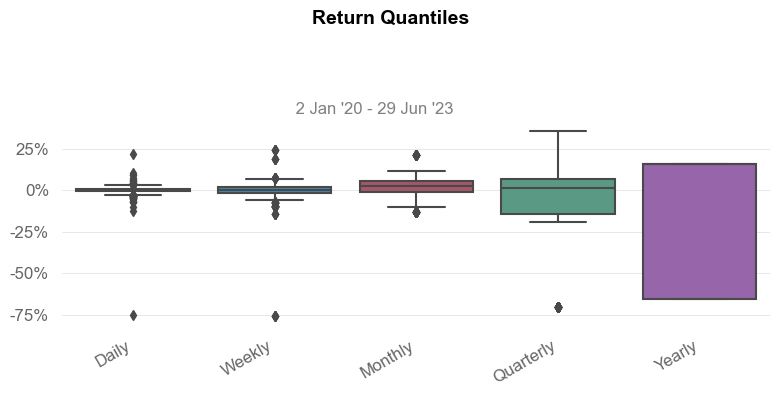

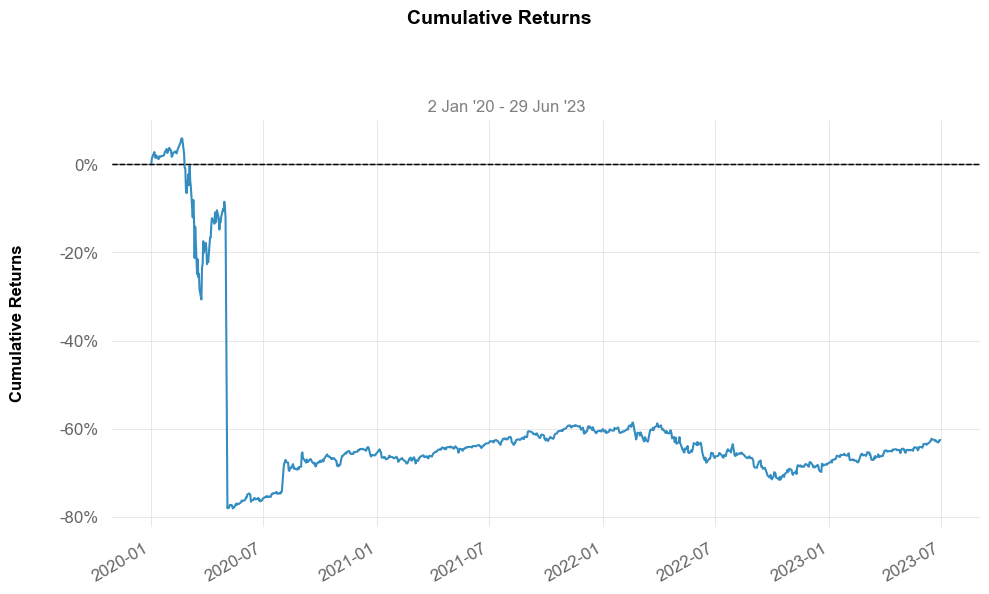

In [18]:
start_date = '2020-01-01'
end_date = '2023-06-30'

returns = calculate_strategy_returns(start_date, end_date)

# Analyze the performance
qs.reports.full(returns)

# Plot the returns
qs.plots.returns(returns)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                           Strategy
-------------------------  ----------
Start Period               2012-01-03
End Period                 2023-06-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -14.23%
CAGR%                      -1.33%
Sharpe                     0.21
Sortino                    0.24
Max Drawdown               -79.29%
Longest DD Days            1221
Volatility (ann.)          31.24%
Calmar                     -0.02
Skew                       -19.25
Kurtosis                   740.57

Expected Daily %           -0.01%
Expected Monthly %         -0.11%
Expected Yearly %          -1.27%
Kelly Criterion            3.45%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.21%
Expected Shortfall (cVaR)  -3.21%

Payoff Ratio               0.9
Profit Factor              1.07
Common Sense Ratio         1.07
CPC Index                  0.52
Tail Ratio                 1.0
Outlier Win Ratio          3.92
Outlier Loss Ratio   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-24,2020-05-13,2023-06-29,1221,-79.294777,-78.544635
2,2015-01-23,2015-12-30,2016-08-01,556,-23.535729,-22.947659
3,2018-01-25,2018-12-19,2019-04-05,435,-21.187740,-17.570334
4,2013-07-19,2013-12-30,2014-11-26,495,-19.843168,-19.336064
5,2016-12-20,2016-12-22,2017-03-01,71,-13.776248,-13.615963


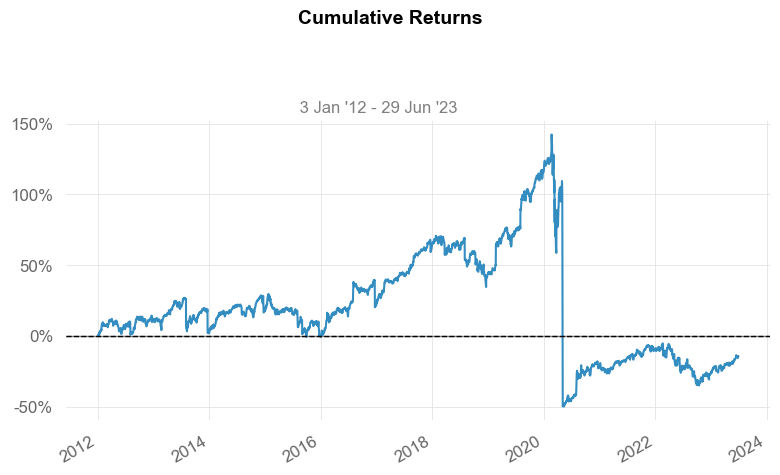

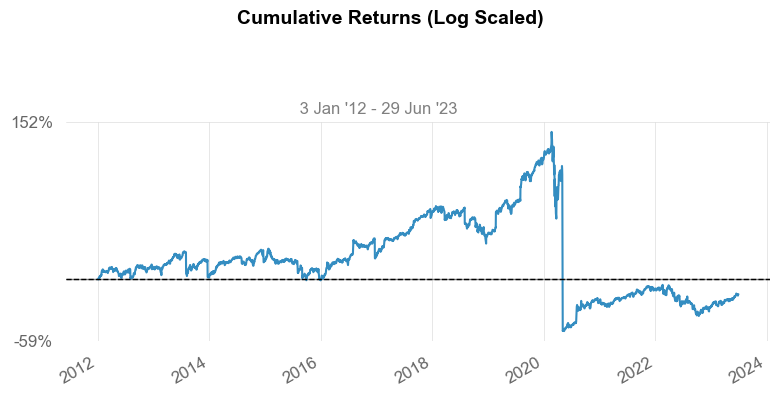

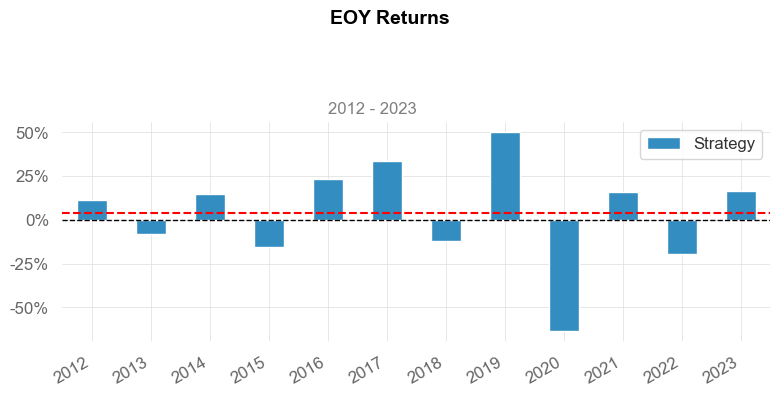

F:\anaconda3\envs\backtest\lib\site-packages\quantstats\_plotting\core.py:340: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _sns.distplot(returns, bins=bins,


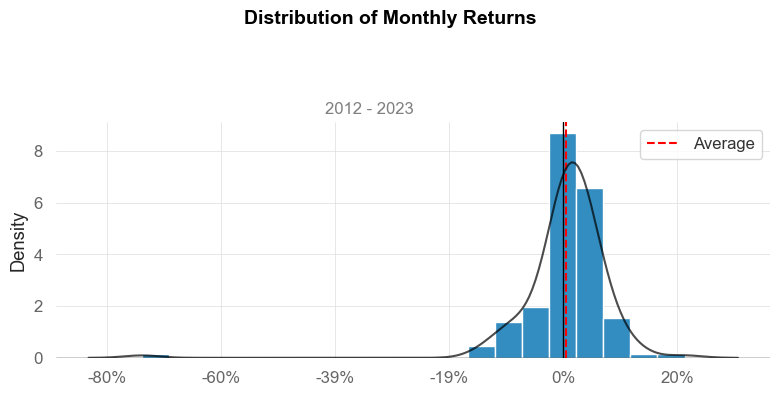

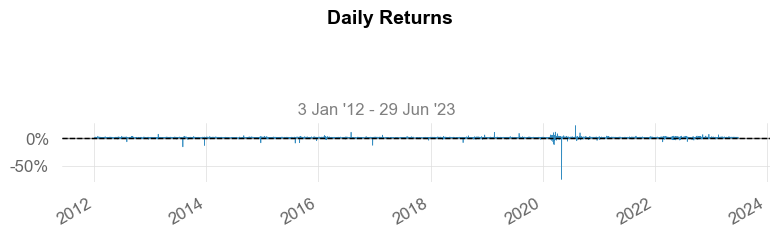

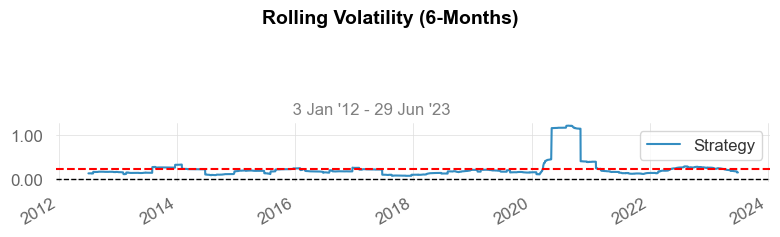

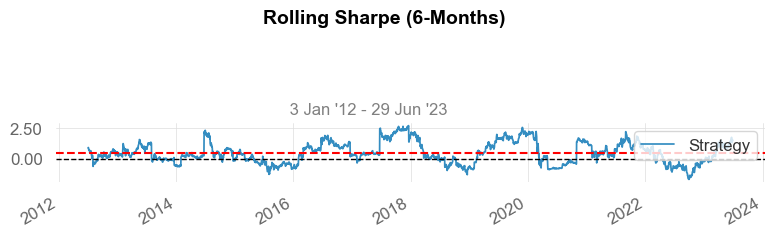

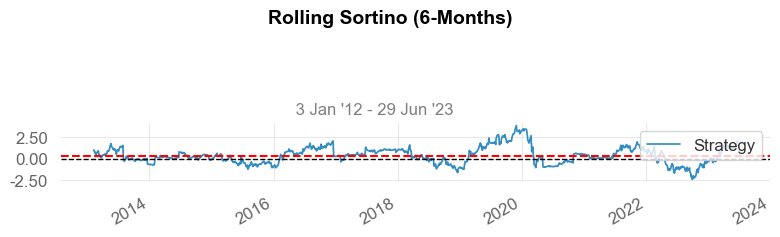

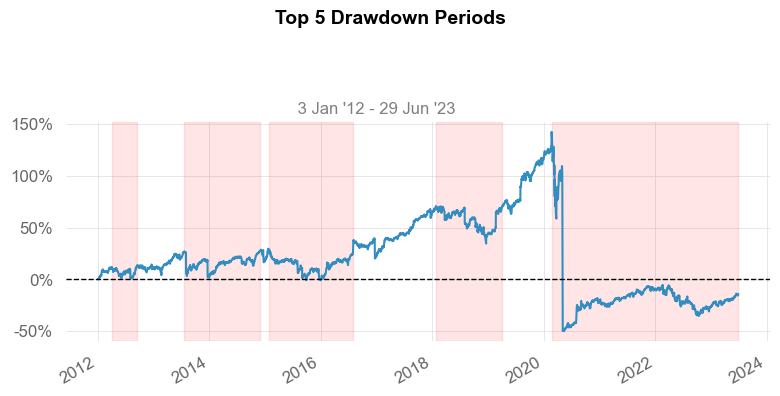

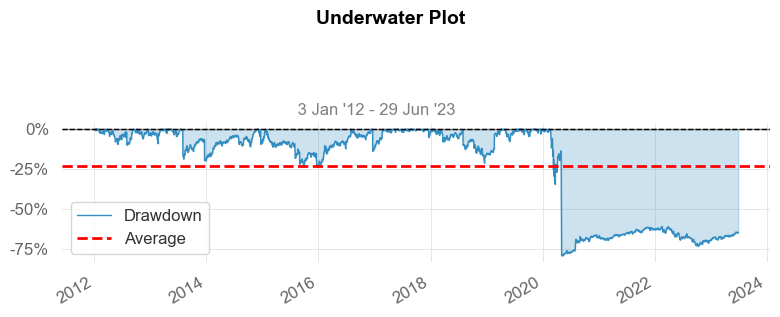

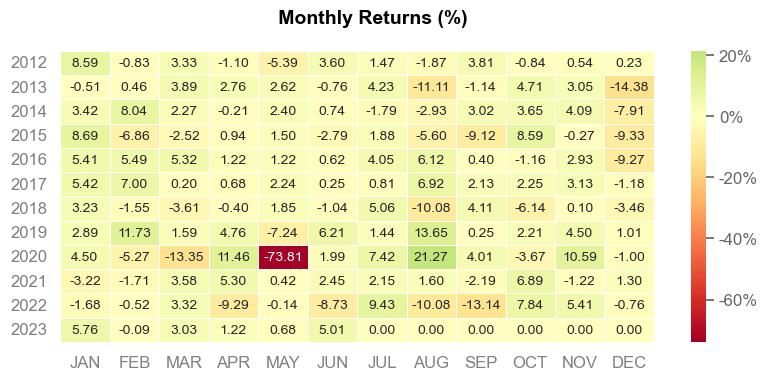

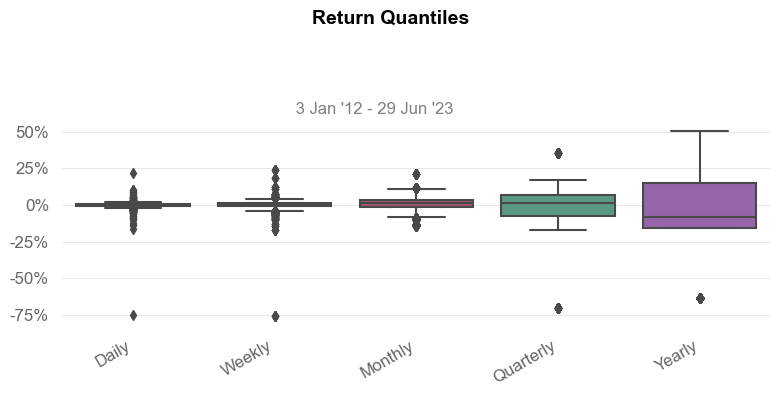

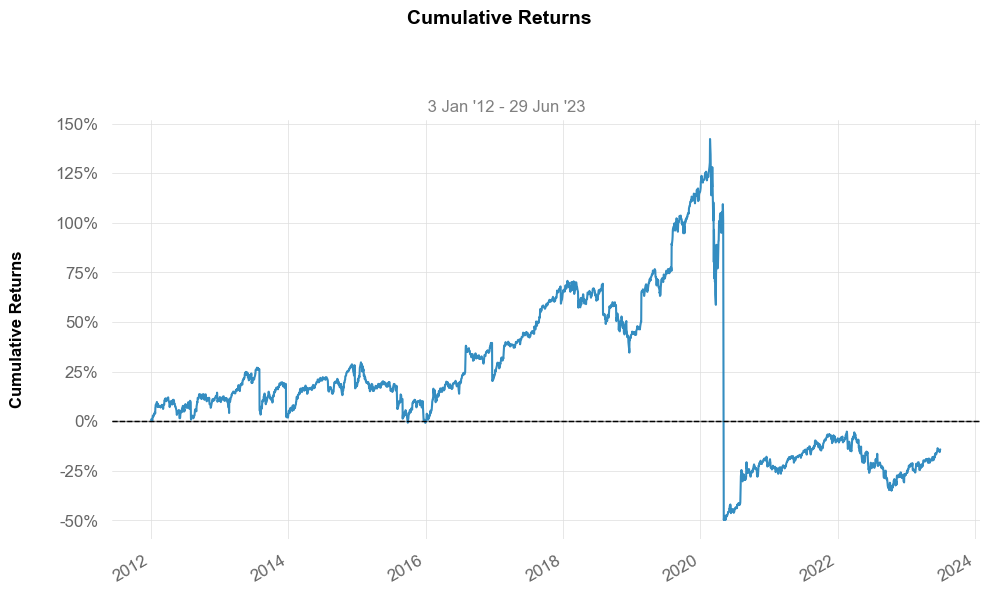

In [19]:
start_date = '2012-01-01'
end_date = '2023-06-30'

returns = calculate_strategy_returns(start_date, end_date)

# Analyze the performance
qs.reports.full(returns)

# Plot the returns
qs.plots.returns(returns)